ROC practice problems from Bill@Deloitte.

Tasks:
1. Plot an ROC Curve
2. Given priors, find operating point.
3. Plot precision as a function of TPR.
4. Confirm that PR depends on tested priors, but ROC does not

## 1. Plot an ROC Curve

To plot an ROC curve we first have to obtain results from a classification problem. Or we could just do something simple using dummy data and an easy classifier. The first dummy set that comes into mind is the Iris dataset... and the initial classifier is a logistic regression. Let's start there.

In [140]:
# import the dataset
from sklearn.datasets import load_iris
iris = load_iris()

# randomize
from numpy import random
mask = random.choice(range(150), replace=False, size=150)

# split train and test datasets
train_X = iris['data'][mask[:100]]
train_y = iris['target'][mask[:100]]
test_X = iris['data'][mask[100:]]
test_y = iris['target'][mask[100:]]

In [141]:
# import classifier and build model on first 125 samples
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
# predict class for last 25 samples
pred_X = classifier.predict_proba(test_X)

In [153]:
# function to calculate build ROC curve
# this one will be binary instead of multinomial
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
def plot_ROC(pred_proba, y_actual, steps=101):
    # instantiate fpr and tpr arrays
    fpr = []
    tpr = []
    # step through descrimation threshold from 0-1 by step_size
    for thresh in numpy.linspace(0, 1, num=steps):
        # assign True if probability >= threshold, else False
        y_pred = np.array([proba>=thresh for proba in pred_proba])
        y_actual = np.array(y_actual)
        # calculate tp, fp, fn, and tn counts
        tp = ((y_pred==True) & (y_actual==True)).sum()
        fp = ((y_pred==True) & (y_actual==False)).sum()
        fn = ((y_pred==False) & (y_actual==True)).sum()
        tn = ((y_pred==False) & (y_actual==False)).sum()
        # calculate and append tpr and fpr
        tpr.append(float(tp)/(tp+fn))
        fpr.append(float(fp)/(fp+tn))
    # plot ROC curve
    plt.plot(fpr, tpr)
    plt.show()
    print fpr
    print tpr

In [155]:
pred_proba0 = [p[0] for p in pred_X]
y_actual0 = [y==0 for y in test_y]
print pred_proba0
print y_actual0

[0.0010811297860463525, 0.024515610726618588, 0.91328834414598126, 0.82349834641902531, 0.0010041618619137597, 0.84360131517098613, 0.010711457967734962, 0.85602225381295594, 0.87199476495655126, 0.018642903319463611, 0.0029163839707114147, 0.82986570618715849, 0.00029623173661177791, 0.042715845912049362, 0.0012845399881740189, 0.87944193115736002, 0.00094353764515903865, 0.14108055813271128, 0.016306521817832546, 0.00072338849871572154, 0.001479015627531741, 7.8673099127239847e-05, 0.0005096368974763807, 0.00081204153086674564, 0.023913740803279862, 0.90109623586110377, 0.015424566541165507, 0.79904686314501416, 0.011351546443769891, 0.011746405823015586, 0.00047837160000304606, 0.88034792803060657, 0.0029930279202472301, 0.85008012972329294, 0.0025610887786518327, 0.039521722642597394, 0.053805468298080181, 0.00077597084514130607, 0.80141493428970723, 0.8864638196782697, 0.00071574610464916527, 0.85472813260309111, 0.02491443100942508, 0.064291550794919286, 0.0043483112559420424, 0.

In [161]:
steps=101
fpr = []
tpr = []
# step through descrimation threshold from 0-1 by step_size
for thresh in np.linspace(0, 1, num=20):
    # assign True if probability >= threshold, else False
    y_pred = np.array([proba>=thresh for proba in pred_proba0])
    y_actual = np.array(y_actual0)
    # calculate tp, fp, fn, and tn counts
    tp = ((y_pred==True) & (y_actual==True)).sum()
    fp = ((y_pred==True) & (y_actual==False)).sum()
    fn = ((y_pred==False) & (y_actual==True)).sum()
    tn = ((y_pred==False) & (y_actual==False)).sum()
    # calculate and append tpr and fpr
    tpr.append(float(tp)/(tp+fn))
    fpr.append(float(fp)/(fp+tn))

In [164]:
fpr

[1.0,
 0.08823529411764706,
 0.029411764705882353,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

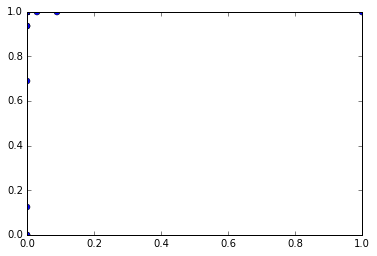

In [168]:
plt.plot(fpr, tpr, 'bo')